In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytest-filter-subpackage

In [3]:
pip install pytest-cov

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow --user

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyasn1-modules>=0.2.1 in c:\users\krithik jain\appdata\roaming\python\python39\site-packages (from google-auth<3,>=1.6.3->tensorboard<2.9,>=2.8->tensorflow) (0.2.8)



In [5]:
import IPython.display as ipd
import random
import os

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [7]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 8s 0us/step


In [8]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [9]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\images\\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [10]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\images\\validation", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7066 images belonging to 7 classes.


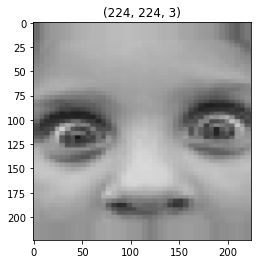

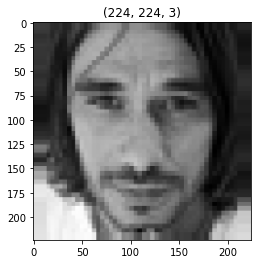

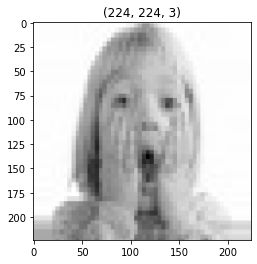

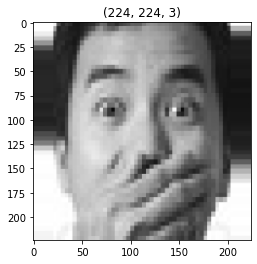

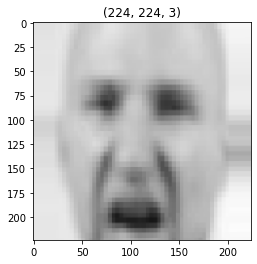

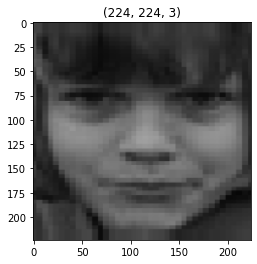

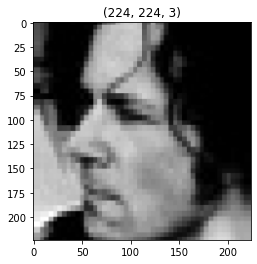

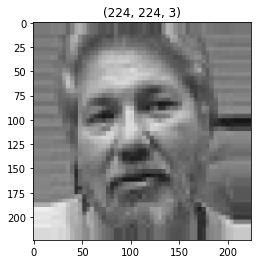

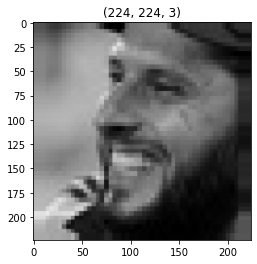

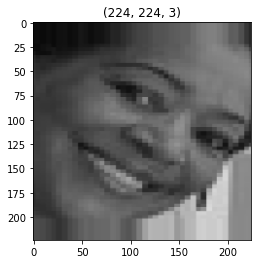

In [11]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [12]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [13]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\KRITHI~1\AppData\Local\Temp/ipykernel_12504/564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 20.5714 - accuracy: 0.1937
Epoch 1: val_accuracy improved from -inf to 0.25391, saving model to best_model.h5
10/10 [==============================] - 21s 2s/step - loss: 20.5714 - accuracy: 0.1937 - val_loss: 16.6918 - val_accuracy: 0.2539
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 13.9816 - accuracy: 0.3125
Epoch 2: val_accuracy improved from 0.25391 to 0.30078, saving model to best_model.h5
10/10 [==============================] - 20s 2s/step - loss: 13.9816 - accuracy: 0.3125 - val_loss: 12.0863 - val_accuracy: 0.3008
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 9.6537 - accuracy: 0.3219 
Epoch 3: val_accuracy improved from 0.30078 to 0.38281, saving model to best_model.h5
10/10 [==============================] - 19s 2s/step - loss: 9.6537 - accuracy: 0.3219 - val_loss: 7.2170 - val_accuracy: 0.3828
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6

In [14]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\Emotion-detection-main\\Emotion-detection-main\\best_model.h5")

In [15]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

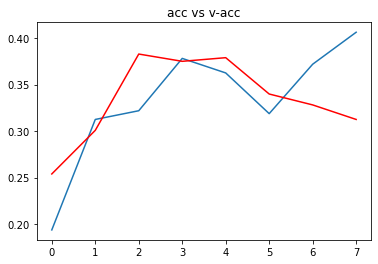

In [16]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

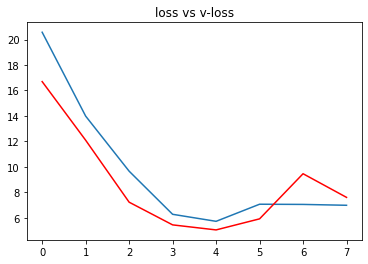

In [17]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [18]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of neutral


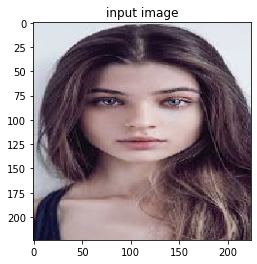

In [30]:
# path for the image to see if it predics correct class

path = "D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\demo\\22.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [32]:
songpath="D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\Song\\"+op[pred]
files=os.listdir(songpath)
d=random.choice(files)
songstring = "D:\\Techno India NJR Institute of Technology\\Major Project\\MusicPlayer\\Song\\"+op[pred]+"//"+d
print(songstring)
#os.startfile(songstring)
ipd.Audio(songstring,autoplay="true", rate=22050)

D:\Techno India NJR Institute of Technology\Major Project\MusicPlayer\Song\neutral//Kahani - Laal Singh Chaddha.mp3
